In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
from torch.autograd import Variable

In [4]:
from torch.utils.tensorboard import SummaryWriter
import datetime,os
import time

import seaborn as sns
sns.set_style('darkgrid')

In [5]:
inputSize = 784
numClasses = 10
numEpochs = 10
learningRate = 0.001
hiddenSize = 500

In [6]:
batchSize = 100

trainDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

testDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=False,
                           transform=transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                        batch_size = batchSize,
                                        shuffle = True)

testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = batchSize,
                                        shuffle = False)

In [7]:
dataIter = iter(trainLoader)
trainX, trainY = next(dataIter)

In [8]:
trainX.shape

torch.Size([100, 1, 28, 28])

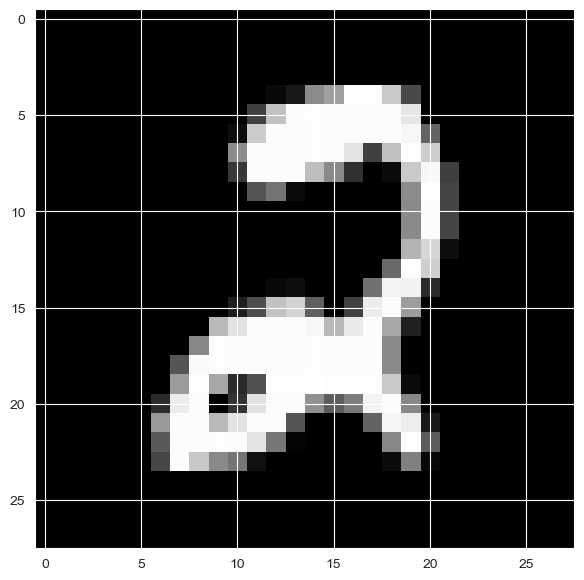

In [9]:
plt.figure(figsize = (14, 7))
plt.imshow(trainX[1, 0], cmap = 'gray')
plt.show()

In [10]:
class ThreeLayerClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerClassification, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)  
        out = self.relu(out)    
        out = self.layer3(out)
        out = self.softmax(out)
        return out
    
model = ThreeLayerClassification(inputSize, hiddenSize, numClasses)

In [11]:
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)
losses = []
model.train()

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Epoch: [1/10], Loss: 2.2908
Epoch: [2/10], Loss: 2.2492
Epoch: [3/10], Loss: 2.2043
Epoch: [4/10], Loss: 2.1422
Epoch: [5/10], Loss: 2.0987
Epoch: [6/10], Loss: 1.9405
Epoch: [7/10], Loss: 1.7859
Epoch: [8/10], Loss: 1.5691
Epoch: [9/10], Loss: 1.4659
Epoch: [10/10], Loss: 1.2316


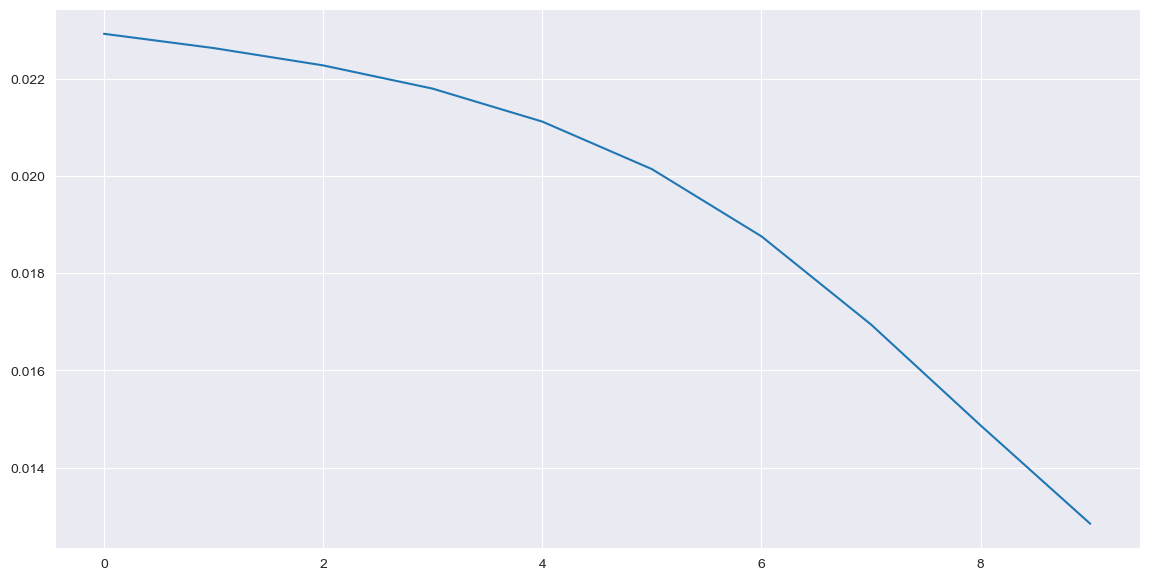

In [13]:
for epoch in range(numEpochs):
    lossTot = 0
    
    for i, (images, labels) in enumerate(trainLoader):
        images = images.view(-1, 28*28) 
        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs.log(), labels)
        loss.backward()
        
        lossTot += loss.detach().data
        
        optimizer.step()
        
    losses.append(lossTot/len(trainDataset))
    print('Epoch: [%d/%d], Loss: %.4f'
         % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses)
plt.show()

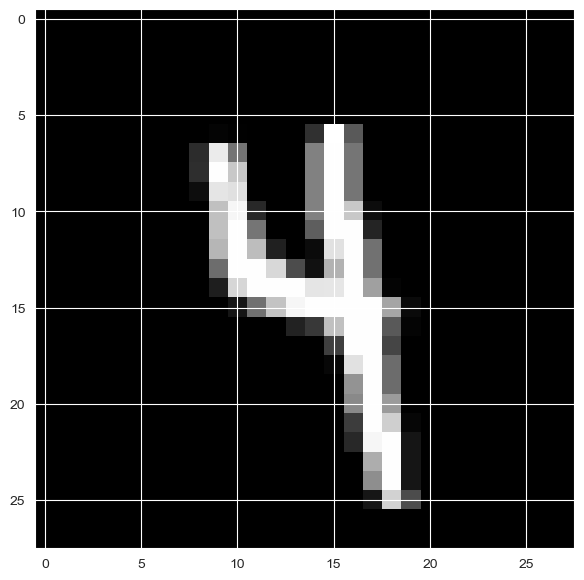

Правильна відповідь tensor(1)


In [14]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap = 'gray')
plt.show()
print('Правильна відповідь', trainY[9])

In [15]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data, dim = 1))

tensor([[0.0098, 0.6229, 0.0605, 0.0831, 0.0152, 0.0362, 0.0453, 0.0150, 0.0932,
         0.0187]])
torch.return_types.max(
values=tensor([0.6229]),
indices=tensor([1]))


In [16]:
correct = 0
total = 0
total_loss = 0 

model.eval()

for images, labels in testLoader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item() 
    
    loss = criterion(outputs, labels)  # Правильно вирівнюємо відступ для обчислення loss
    total_loss += loss.item()

accuracy = 100 * correct / total
average_loss = total_loss / len(testLoader)  # Обчислюємо середню похибку

print('Accuracy for 10000 images: %.2f %%' % accuracy)
print('Average Loss: %.4f' % average_loss)

Accuracy for 10000 images: 76.74 %
Average Loss: 2.0586


In [17]:
print(model)

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [18]:
import torchviz

In [19]:
model.named_parameters()

<generator object Module.named_parameters at 0x000001EE94769740>

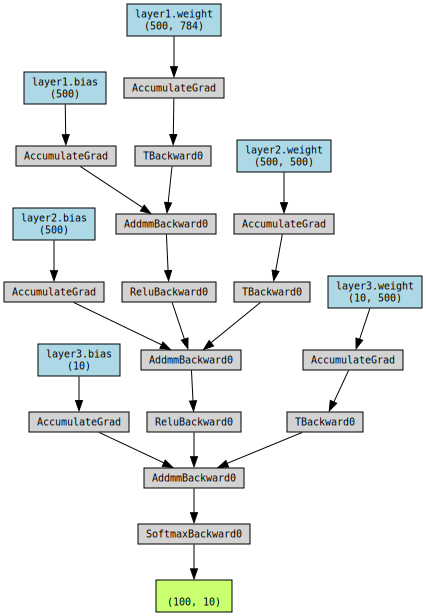

In [20]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [21]:
#Mean Squared Error

In [22]:
import torch.nn.functional as F
from torch.optim import Adam

In [23]:
batchSize = 100

trainDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

testDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                        batch_size = batchSize,
                                        shuffle = True)

testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = batchSize,
                                        shuffle = False)

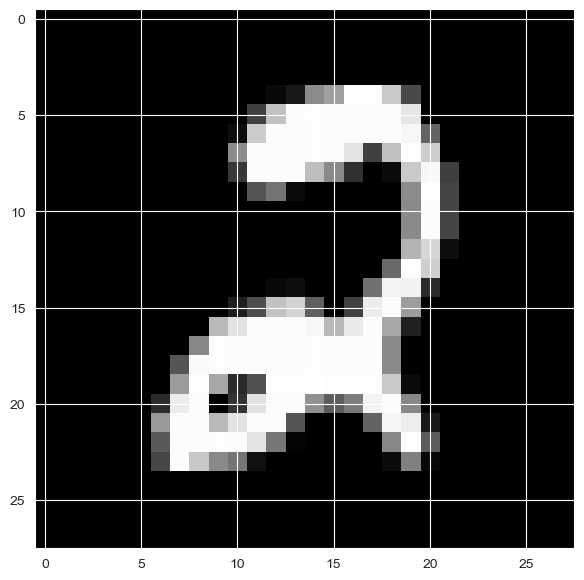

In [24]:
plt.figure(figsize = (14, 7))
plt.imshow(trainX[1, 0], cmap = 'gray')
plt.show()

In [25]:
class ThreeLayerClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerClassification, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.softmax(out)
        return out
    
model = ThreeLayerClassification(inputSize, hiddenSize, numClasses)

In [26]:
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

In [27]:
criterion = nn.MSELoss() # Використовуємо MSE для обчислення похибки
optimizer = Adam(model.parameters(), lr=learningRate) #оптимізатор ADAM
losses = []
model.train()

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Epoch: [1/10], Loss: 0.0043
Epoch: [2/10], Loss: 0.0032
Epoch: [3/10], Loss: 0.0040
Epoch: [4/10], Loss: 0.0057
Epoch: [5/10], Loss: 0.0012
Epoch: [6/10], Loss: 0.0031
Epoch: [7/10], Loss: 0.0068
Epoch: [8/10], Loss: 0.0023
Epoch: [9/10], Loss: 0.0048
Epoch: [10/10], Loss: 0.0017


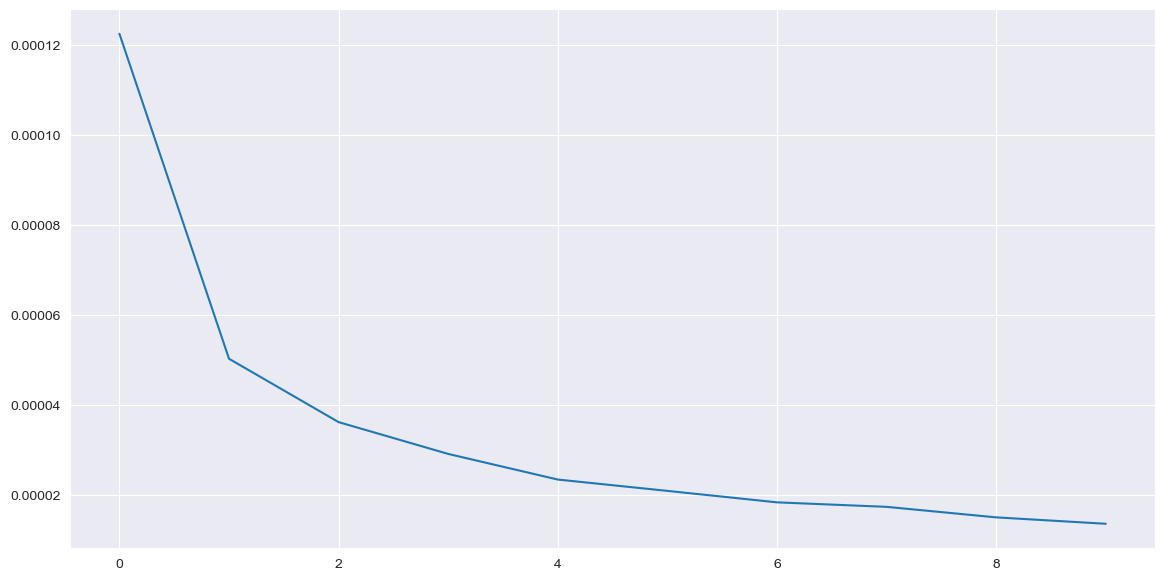

In [28]:
for epoch in range(numEpochs):
    lossTot = 0
    
    for i, (images, labels) in enumerate(trainLoader):
        images = images.view(-1, 28*28) 
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, F.one_hot(labels, numClasses).float())
        loss.backward()
        
        lossTot += loss.detach().data
        
        optimizer.step()
        
    losses.append(lossTot/len(trainDataset))
    print('Epoch: [%d/%d], Loss: %.4f'
         % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses)
plt.show()

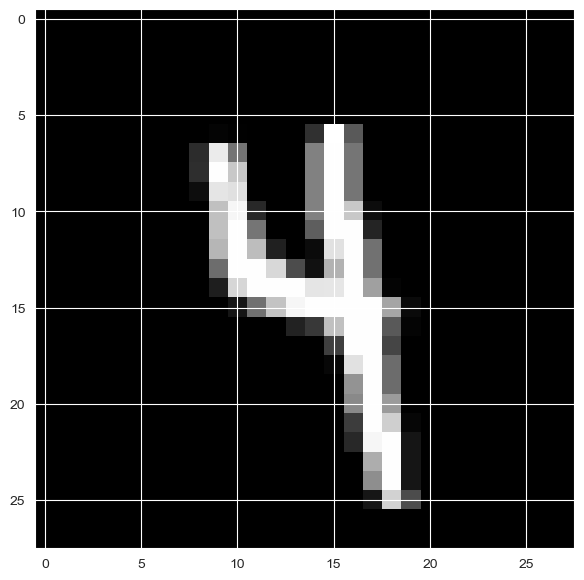

Правильна відповідь tensor(1)


In [29]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap = 'gray')
plt.show()
print('Правильна відповідь', trainY[9])

In [30]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data, dim = 1))

tensor([[1.2303e-10, 1.0000e+00, 1.1434e-11, 8.3842e-11, 9.9065e-08, 1.8578e-09,
         4.4273e-10, 1.7869e-08, 9.0403e-07, 1.5513e-09]])
torch.return_types.max(
values=tensor([1.0000]),
indices=tensor([1]))


In [31]:
correct = 0
total = 0
total_mse = 0

model.eval()

for images, labels in testLoader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    target_one_hot = F.one_hot(labels, num_classes=numClasses).float()
    mse = F.mse_loss(outputs, target_one_hot)
    total_mse += mse.item()

accuracy = 100 * correct / total
average_mse = total_mse / len(testLoader)

print('Accuracy for 10000 images: %.2f %%' % accuracy)
print('Average MSE: %.4f' % average_mse)

print(model)

Accuracy for 10000 images: 99.33 %
Average MSE: 0.0011
ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [32]:
print(model)

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [33]:
import torchviz

In [34]:
model.named_parameters()

<generator object Module.named_parameters at 0x000001EE93597540>

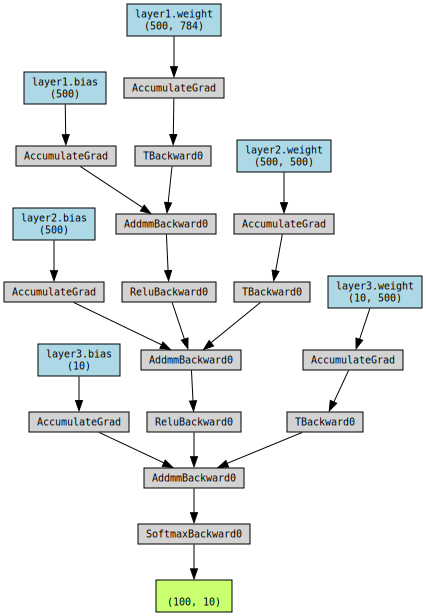

In [35]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [37]:
"""
З огляду на надані результати, метод з використанням функції втрат Mean Squared Error (MSE) демонструє кращу ефективність з точки зору точності на тестовому наборі та зменшення втрат, що може вказувати на його відповідність для цієї конкретної задачі порівняно з CrossEntropyLoss.
"""

'\nЗ огляду на надані результати, метод з використанням функції втрат Mean Squared Error (MSE) демонструє кращу ефективність з точки зору точності на тестовому наборі та зменшення втрат, що може вказувати на його відповідність для цієї конкретної задачі порівняно з CrossEntropyLoss.\n'